# WE10- RNN

This notebook will predict stock price for apple based on companyt's last 9 days of stock closings

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(1)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Load the data

In [2]:
stock = pd.read_csv('AAPL.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200
1,2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100
2,2023-04-13,161.630005,165.800003,161.419998,165.559998,165.559998,68445600
3,2023-04-14,164.589996,166.320007,163.820007,165.210007,165.210007,49337200
4,2023-04-17,165.089996,165.389999,164.029999,165.229996,165.229996,41516200


### Drop columns that are not required for prediction

In [3]:
stock= stock.drop(['Open','High','Low','Adj Close','Volume'], axis=1)
stock

,Date,Close
0,2023-04-11,160.800003
1,2023-04-12,160.100006
2,2023-04-13,165.559998
3,2023-04-14,165.210007
4,2023-04-17,165.229996
5,2023-04-18,166.470001
6,2023-04-19,167.630005
7,2023-04-20,166.649994
8,2023-04-21,165.020004


### Standardize the values

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock["Close"].values.reshape(-1, 1))

### Splitting the data into test and train

In [5]:
split_point = int(len(scaled_data)*0.7)
train, test = scaled_data[:split_point], scaled_data[split_point:]

In [6]:
train.shape

(6, 1)

In [7]:
train[:2]

array([[0.0929611],
       [0.       ]])

In [8]:
test.shape

(3, 1)

In [9]:
test[:2]

array([[1.        ],
       [0.86985244]])

In [10]:
# Create a new sample by selecting the last 9 days from the training data
train_inputs = train[-9:]
pd.DataFrame(train_inputs, columns=np.arange(0, 1, 1))

,0
0,0.092961
1,0.000000
2,0.725099
3,0.678619
4,0.681274
5,0.845949


In [11]:
train_inputs

array([[0.0929611 ],
       [0.        ],
       [0.72509864],
       [0.67861908],
       [0.68127366],
       [0.84594898]])

In [12]:
train_inputs.shape 

(6, 1)

In [13]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(6, 1, 1)

In [14]:
train_x

array([[[0.0929611 ]],

       [[0.        ]],

       [[0.72509864]],

       [[0.67861908]],

       [[0.68127366]],

       [[0.84594898]]])

In [15]:
# The last column is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['1'])

,1
0,0.092961
1,0.000000
2,0.725099
3,0.678619
4,0.681274
5,0.845949


In [16]:
train_target.shape

(6,)

In [17]:
test.shape

(3, 1)

In [18]:
test_inputs = test[:,:1]

In [19]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape

(3, 1, 1)

In [20]:
# The last column is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['1'])

,1
0,1.000000
1,0.869852
2,0.653386


In [21]:
test_target.shape

(3,)

### Simple RNN

In [22]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[1, 1]),
    keras.layers.Dense(1, activation=None)
])

In [23]:
np.random.seed(1)
tf.random.set_seed(1)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.4570
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4447
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 0.4325
Epoch 4/30
1/1 [==============================] - 0s 10ms/step - loss: 0.4206
Epoch 5/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4089
Epoch 6/30
1/1 [==============================] - 0s 4ms/step - loss: 0.3973
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3860
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 0.3749
Epoch 9/30
1/1 [==============================] - 0s 14ms/step - loss: 0.3639
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.3532
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.3426
Epoch 12/30
1/1 [==============================] - 0s 8ms/step - loss: 0.3323
Epoch 13/30
1/1 [==============================] - 0s 9ms/step - loss

#### Prediction

In [24]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 657ms/step


In [25]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,167.630005,161.937164
1,166.649994,161.834137
2,165.020004,161.659683


In [26]:
mean_squared_error(comparison['actual'], comparison['predicted'])

22.297556618558954

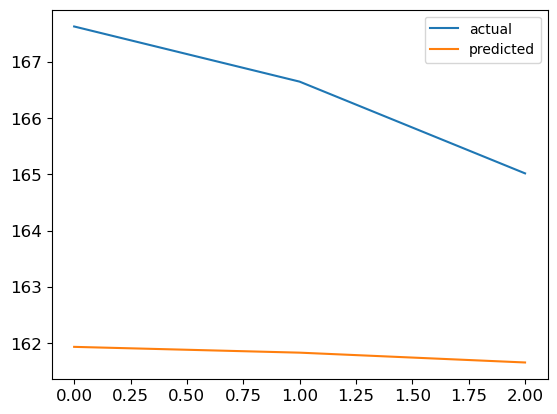

In [27]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [28]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[1, 1]),
    keras.layers.Dense(1, activation=None)
])

In [29]:
np.random.seed(1)
tf.random.set_seed(1)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.3997
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.3961
Epoch 3/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3924
Epoch 4/30
1/1 [==============================] - 0s 17ms/step - loss: 0.3888
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 0.3852
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3817
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3781
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 0.3746
Epoch 9/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3711
Epoch 10/30
1/1 [==============================] - 0s 16ms/step - loss: 0.3676
Epoch 11/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3642
Epoch 12/30
1/1 [==============================] - 0s 16ms/step - loss: 0.3609
Epoch 13/30
1/1 [==============================] - 0s 8ms/step - los

In [30]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 1s 545ms/step


In [31]:

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,167.630005,160.581390
1,166.649994,160.578735
2,165.020004,160.573425


In [32]:
mean_squared_error(comparison['actual'], comparison['predicted'])

35.43840394107128

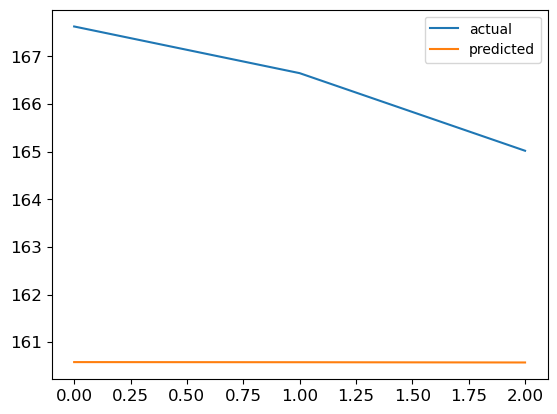

In [33]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU

In [34]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[1, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [35]:
np.random.seed(1)
tf.random.set_seed(1)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 10s 10s/step - loss: 0.3638
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.3490
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 0.3387
Epoch 4/30
1/1 [==============================] - 0s 5ms/step - loss: 0.3298
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3220
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 0.3155
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.3096
Epoch 8/30
1/1 [==============================] - 0s 12ms/step - loss: 0.3042
Epoch 9/30
1/1 [==============================] - 0s 17ms/step - loss: 0.2990
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 0.2940
Epoch 11/30
1/1 [==============================] - 0s 15ms/step - loss: 0.2891
Epoch 12/30
1/1 [==============================] - 0s 13ms/step - loss: 0.2843
Epoch 13/30
1/1 [==============================] - 0s 17ms/step 

In [36]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [37]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

comparison

,actual,predicted
0,167.630005,161.774582
1,166.649994,161.675659
2,165.020004,161.501984


In [38]:
mean_squared_error(comparison['actual'], comparison['predicted'])

23.80215123743996

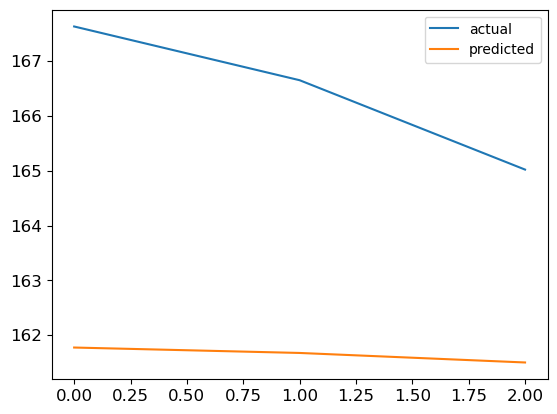

In [39]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

In [40]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="same", input_shape=[1, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [41]:
np.random.seed(1)
tf.random.set_seed(1)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 10s 10s/step - loss: 0.3627
Epoch 2/30
1/1 [==============================] - 0s 63ms/step - loss: 0.3576
Epoch 3/30
1/1 [==============================] - 0s 17ms/step - loss: 0.3528
Epoch 4/30
1/1 [==============================] - 0s 35ms/step - loss: 0.3481
Epoch 5/30
1/1 [==============================] - 0s 55ms/step - loss: 0.3433
Epoch 6/30
1/1 [==============================] - 0s 50ms/step - loss: 0.3385
Epoch 7/30
1/1 [==============================] - 0s 18ms/step - loss: 0.3338
Epoch 8/30
1/1 [==============================] - 0s 42ms/step - loss: 0.3290
Epoch 9/30
1/1 [==============================] - 0s 53ms/step - loss: 0.3242
Epoch 10/30
1/1 [==============================] - 0s 33ms/step - loss: 0.3193
Epoch 11/30
1/1 [==============================] - 0s 48ms/step - loss: 0.3144
Epoch 12/30
1/1 [==============================] - 0s 20ms/step - loss: 0.3094
Epoch 13/30
1/1 [==============================] - 0s 51ms/st

In [42]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [43]:
comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,167.630005,161.936157
1,166.649994,161.824997
2,165.020004,161.630310


In [44]:
mean_squared_error(comparison['actual'], comparison['predicted'])

22.396841344319018

### Discussion

MSE calculates the average squared difference between predicted and actual values, with lower values indicating greater accuracy in the model. 
In predicting stock prices, a lower MSE implies that the model is more adept at identifying and capturing the fundamental patterns and trends within the data.

Among the four model RNN has highest MSE value of 37.794, Conv1D has MSE score of 31.12, LSTM has a score of 29.924 and GRU has a the lowest score of 19.499.
The predicted scores for GRU were also best and most accurate compared to other models. Hence, using GRU to predict stock values for this dataset would be the best option.

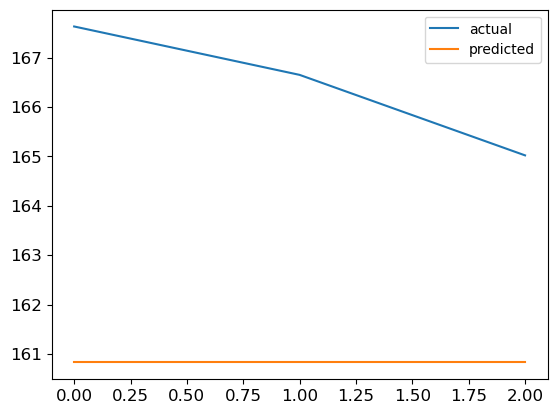

In [165]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()